# Plot the top pathways for the overlapping genes

### Import necessary libraries and dataframes

* Dataframes for the pathway analysis of each of the overlapping top genes (sibling sets, nonsibling vs. sibling, all three sets)

In [12]:
# Load the required library
library(ggplot2)

In [13]:
#my dataframes

onlynonsibs = '/home/sarah.ancheta/bruno1/projects/data.science/sarah.ancheta/ZF_atlas/Zebrafish_atlas/continued_KLD_analysis/pathway_analysis_onlyNonsibs.csv'
onlys1 = '/home/sarah.ancheta/bruno1/projects/data.science/sarah.ancheta/ZF_atlas/Zebrafish_atlas/continued_KLD_analysis/pathway_analysis_onlysibs1.csv'
onlys2 = '/home/sarah.ancheta/bruno1/projects/data.science/sarah.ancheta/ZF_atlas/Zebrafish_atlas/continued_KLD_analysis/pathway_analysis_onlysibs2.csv'
justsibs = '/home/sarah.ancheta/bruno1/projects/data.science/sarah.ancheta/ZF_atlas/Zebrafish_atlas/continued_KLD_analysis/pathway_analysis_justsiblingSets_Overlap.csv'
overlapsibs = '/home/sarah.ancheta/bruno1/projects/data.science/sarah.ancheta/ZF_atlas/Zebrafish_atlas/continued_KLD_analysis/pathway_analysis_alloverlapSibs.csv'
alloverlaps = '/home/sarah.ancheta/bruno1/projects/data.science/sarah.ancheta/ZF_atlas/Zebrafish_atlas/continued_KLD_analysis/pathway_analysis_SibsAndNonsibsOverlap.csv'

## Plot for all overlapping genes (top 2% of sibs and nonsibs, overlap)
* We convert the p-value to base log10
* We identify and count the number of overlapping genes

In [14]:
df <- read.csv(alloverlaps)

In [15]:
df

X,Rank,pathway,P_value,Z_score,Combined_score,Overlapping_genes,Adjusted_pval,Old_pval,Old_adjusted_pval,database
<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<chr>
0,1,"VEGF, Hypoxia, and Angiogenesis Homo sapiens h vegfPathway",5.396092e-04,67.85374,510.57670,"['ACTA1', 'HSP90AA1']",1.025257e-02,0,0,BioCarta_2016
1,2,NFAT and Hypertrophy of the heart Homo sapiens h nfatPathway,1.162071e-03,45.20408,305.46889,"['ACTA1', 'ATP2A1']",1.103968e-02,0,0,BioCarta_2016
19,1,actin-myosin filament sliding (GO:0033275),4.230708e-28,837.10490,52762.73263,"['ACTA1', 'ACTC1', 'DES', 'MYH3', 'TPM3', 'MYL1', 'TNNT2', 'TNNT3', 'MYL3', 'TNNI2', 'NEB', 'TTN']",5.838377e-26,0,0,GO_Biological_Process_2021
20,2,muscle filament sliding (GO:0030049),4.230708e-28,837.10490,52762.73263,"['ACTA1', 'ACTC1', 'DES', 'MYH3', 'TPM3', 'MYL1', 'TNNT2', 'TNNT3', 'MYL3', 'TNNI2', 'NEB', 'TTN']",5.838377e-26,0,0,GO_Biological_Process_2021
21,3,muscle contraction (GO:0006936),8.104910e-26,268.66473,15522.03581,"['TPM3', 'NEB', 'TTN', 'MYLPF', 'ACTA1', 'ACTC1', 'DES', 'MYH3', 'MYL1', 'TNNT2', 'TNNT3', 'MYL3', 'TNNI2', 'MYL10']",7.456517e-24,0,0,GO_Biological_Process_2021
22,4,striated muscle contraction (GO:0006941),2.833464e-11,146.53676,3558.92903,"['MYH3', 'TNNT2', 'TNNT3', 'MYL3', 'TNNI2', 'TTN']",1.955090e-09,0,0,GO_Biological_Process_2021
23,5,heart contraction (GO:0060047),9.206732e-10,153.86574,3201.31768,"['ACTC1', 'TNNT2', 'MYL3', 'TNNI2', 'TTN']",5.082116e-08,0,0,GO_Biological_Process_2021
24,6,myofibril assembly (GO:0030239),1.180831e-09,145.75292,2996.24979,"['ACTC1', 'MYH3', 'TNNT2', 'TNNT3', 'TTN']",5.431822e-08,0,0,GO_Biological_Process_2021
25,7,actomyosin structure organization (GO:0031032),2.210948e-08,77.87950,1372.80213,"['ACTC1', 'MYH3', 'TNNT2', 'TNNT3', 'TTN']",8.190499e-07,0,0,GO_Biological_Process_2021


In [16]:
# Convert p-value to base 10 logarithm
df$log_p_value <- -log10(df$P_value)
# Calculate the count of overlapping genes
df$gene_count <- lapply(df$Overlapping_genes, function(x) unlist(strsplit(x, ", ")))
df$gene_len <- sapply(df$gene_count, length)

* Removes rows in which the same list of genes is repeated
* Takes the first instance in which the unique gene set is seen

In [17]:
df$overlapping_genes <- sapply(df$Overlapping_genes, function(x) paste(sort(x), collapse=","))

duplicates <- duplicated(df$overlapping_genes, fromLast = TRUE)

# Subset dataframe to keep only the unique rows
df_2 <- df[!duplicates, ]
                                                            

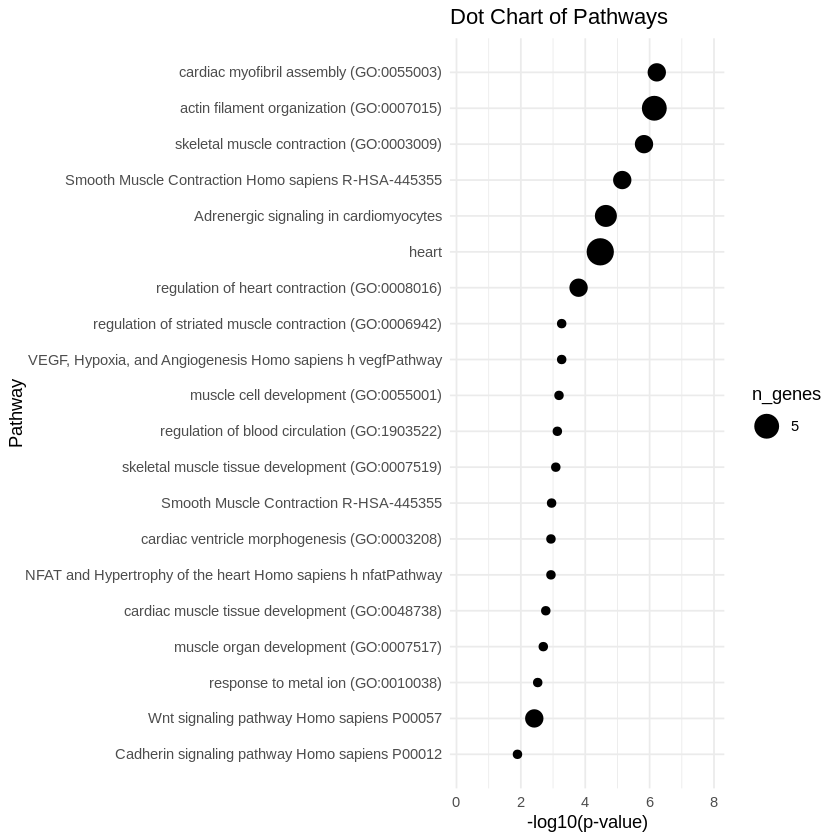

In [27]:
df_2$pathway <- factor(df_2$pathway, levels = df_2$pathway[order(df_2$log_p_value)])

df_2 <- df_2[order(df_2$log_p_value), ]

# Select the top 20 rows
df_filtered <- head(df_2, 20) 

#df_filtered <- df_2

# Create the dot chart with expanded axis limits
plot <- ggplot(df_filtered, aes(x = log_p_value, y = pathway, size = gene_len)) +
  geom_point() +
  scale_size_continuous(range = c(2, 7), breaks = c(5, 10), labels = c("5", "10"), name = "n_genes") +
  scale_x_continuous(expand = c(0.3, 0.8)) +
  scale_y_discrete(expand = c(0.05, 0)) +
  labs(x = "-log10(p-value)", y = "Pathway", title = "Dot Chart of Pathways") +
  theme_minimal()

#ggsave("/home/sarah.ancheta/bruno/projects/data.science/sarah.ancheta/ZF_atlas/Zebrafish_atlas/continued_KLD_analysis/pathway_analysis_plots/alloverlap_dot_chart_Feb29.pdf", plot, width = 8, height = 6)
plot

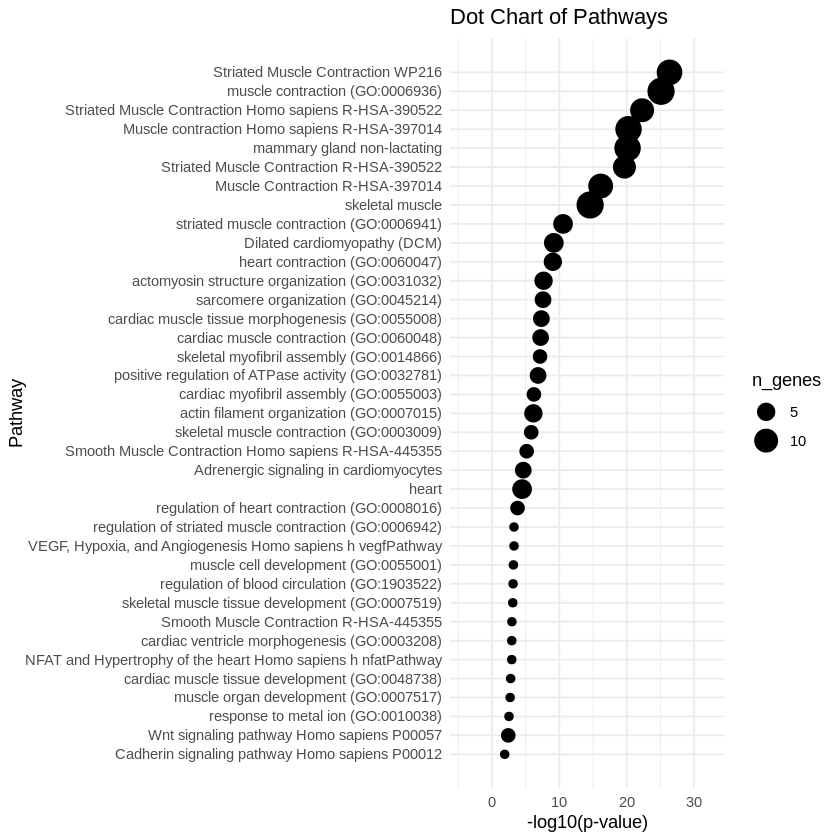

In [28]:
# Create the dot chart with expanded axis limits
ggplot(df_2, aes(x = log_p_value, y = pathway, size = gene_len)) +
  geom_point() +
  scale_size_continuous(range = c(2, 7), breaks = c(5, 10), labels = c("5", "10"), name = "n_genes") +   # Adjust the size range as needed
  scale_x_continuous(expand = c(0.3, 0.8)) +  # Expand x-axis limits by 5% on both sides
  scale_y_discrete(expand = c(0.05, 0)) +    # Expand y-axis limits by 5% on the bottom
  labs(x = "-log10(p-value)", y = "Pathway", title = "Dot Chart of Pathways") +
  theme_minimal()